In [ ]:
import os
import cv2
import numpy as np
from knn import KNNClassifier

root_folder_path = os.getcwd()
root_folder_path = os.path.join(root_folder_path, "..")

knn = KNNClassifier()

# load images
train_data = []
train_labels = []

images_path = f"{root_folder_path}/images/Fotos"

elements = ["tuercas", "tornillos", "arandelas", "clavos"]
# hu_moments = np.array([[], [], [], [], [], [], []])
for element in elements:

    for img in os.listdir(f"{images_path}/{element}"):
        img_new = cv2.imread(
            f"{images_path}/{element}/{img}",
            cv2.IMREAD_GRAYSCALE
        )
        if img_new is not None:
            img_resized = cv2.resize(img_new, (500, 500))
            train_data.append(np.array(img_resized).flatten())
            train_labels.append(elements.index(element))

            # hu_moments = np.concatenate((hu_moments, cv2.HuMoments(cv2.moments(img_resized))), axis=1)

        else:
            print(f"Error: It is not possible to read the iamge {element}/{img}")

# convert to numpy array
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# train knn
knn.fit(train_data, train_labels, elements)

knn.train_images.shape

In [ ]:
import matplotlib.pyplot as plt

scatter_data_x = knn.train_images[:, 4]
scatter_data_y = knn.train_images[:, 5]

s = plt.scatter(knn.train_images[:, 4], knn.train_images[:, 5], c=knn.train_labels, cmap='viridis', edgecolors='k', marker='o', s=50)
plt.title('Scatter Plot of 4 Clusters using KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(
    loc='upper right'
)
plt.show()

['clavos']


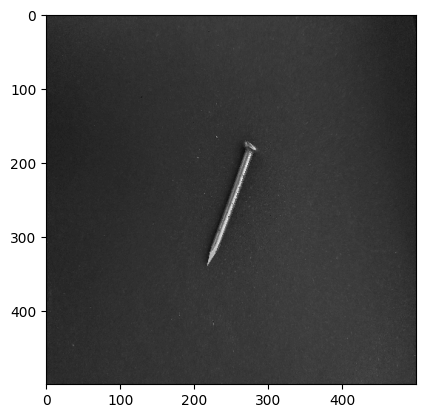

In [30]:
import matplotlib.pyplot as plt

img_test = cv2.imread(
    f"{root_folder_path}/src/clavo.jpg",
    cv2.IMREAD_GRAYSCALE
)
img_test = cv2.resize(img_test, (500, 500))
img_test_flatten = np.array(img_test).flatten()

category = knn.predict([img_test_flatten], k=6)

# print(cv2.HuMoments(cv2.moments(img_test)).flatten())
print(category)
plt.imshow(img_test, cmap="gray")

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_test = cv2.imread(
    f"{images_path}/tornillos/tornillo2.jpg",
    cv2.IMREAD_GRAYSCALE
)
img_test = cv2.resize(img_test, (500, 500))

_, img_bw = cv2.threshold(img_test, 180, 255, cv2.THRESH_BINARY)
img_canny = cv2.Canny(img_test, 80, 80)

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)
open_img = cv2.erode(cv2.dilate(img_canny, kernel, iterations=1), kernel, iterations=1)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)
close_img = cv2.dilate(cv2.erode(open_img, kernel, iterations=1), kernel, iterations=1)
kernel_size = 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)
open_img2 = cv2.erode(cv2.dilate(close_img, kernel, iterations=1), kernel, iterations=1)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1), plt.imshow(img_test, cmap="gray")
plt.subplot(2,2,2), plt.imshow(img_bw, cmap="gray")
plt.subplot(2,2,3), plt.imshow(img_canny, cmap="gray")
plt.subplot(2,2,4), plt.imshow(open_img2, cmap="gray")